In [6]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
%matplotlib inline
import numpy as np
from astropy_healpix import HEALPix
from scipy.interpolate import griddata

def nside_to_pixel_area(nside):
    nside = np.asanyarray(nside, dtype=np.int64)
    npix = 12 * nside * nside
    pixel_area = 4 * np.pi / npix * u.sr
    return pixel_area
    
def nside_to_pixel_resolution(nside):
    nside = np.asanyarray(nside, dtype=np.int64)
    return (nside_to_pixel_area(nside) ** 0.5).to(u.arcmin)

def av_map(ra, dec, radius, level, A0, HPId):
    coord = SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')
    hp = HEALPix(nside=2**level, order='nested', frame='icrs')
    search=hp.cone_search_skycoord(coord, radius)
    ext = A0[np.isin(HPId, search)]
    common = HPId[np.isin(HPId, search)]
    cd = hp.healpix_to_skycoord(common)
    ra = np.unique(cd.ra.value)
    dec = np.unique(cd.dec.value)
    X, Y = np.meshgrid(ra, dec)
    beta = griddata(np.transpose(np.array([cd.ra.value, cd.dec.value])), np.array(ext), (X, Y))
    im = plt.imshow(beta, cmap=plt.cm.viridis, aspect='equal', extent=[X.min(), X.max(), Y.min(), Y.max()], 
                     origin='lower')
    plt.colorbar(im)
    plt.show()
    

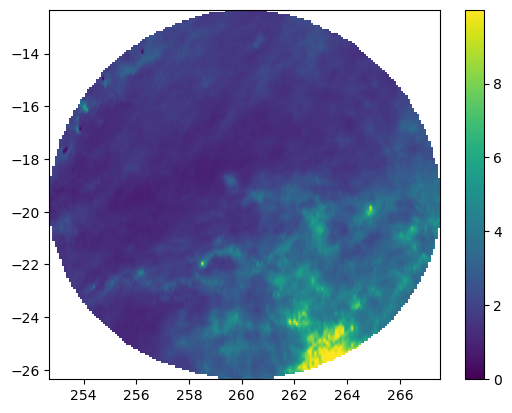

6.870972823634812 arcmin


In [9]:
data = np.load('I_355_tgextmap.npz')
HPId = data['HPId']
A0 = data['A0']
level = 9

ra = 260.10740722
dec = -19.3523078
radius = 7*u.deg

av_map(ra, dec, radius, level, A0, HPId)

f=nside_to_pixel_resolution(2**level)
print(f)